# Imports

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlchecks.checks.performance import NaiveModelComparision
from mlchecks.base import Dataset

# Generating data:

In [2]:
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
train_ds = Dataset(pd.concat([x_train, y_train], axis=1),
                   features=iris.feature_names,
                   label='target')
val_ds = Dataset(pd.concat([x_test, y_test], axis=1),
                 features=iris.feature_names,
                 label='target')
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)

AdaBoostClassifier()

# Running naive_comparision check:

## Random model check:

In [3]:
check = NaiveModelComparision(naive_model_type='random')

Naive Model Comparison

Compare naive model score to given model score.

AdaBoostClassifier Model prediction has achieved 0.92 in Accuracy compared to Naive random prediction which achived 0.2 on tested data.

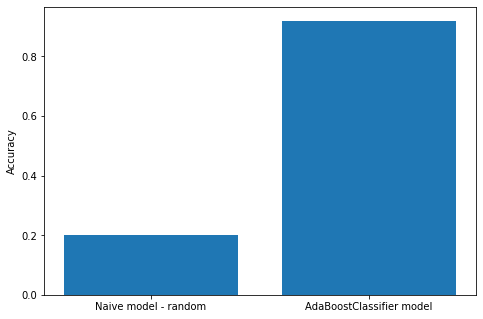

In [4]:
check.run(train_ds, val_ds, clf)

## Tree model check:

In [5]:
check = NaiveModelComparision(naive_model_type='statistical')

Naive Model Comparison

Compare naive model score to given model score.

AdaBoostClassifier Model prediction has achieved 0.92 in Accuracy compared to Naive statistical prediction which achived 0.3 on tested data.

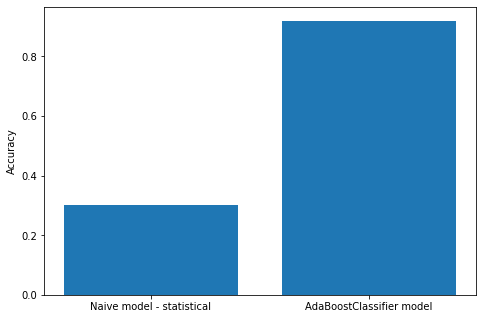

In [6]:
check.run(train_ds, val_ds, clf)